<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython.git

Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 1033, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 1033 (delta 275), reused 103 (delta 95), pack-reused 704 (from 2)
Receiving objects: 100% (1033/1033), 58.73 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (544/544), done.


In [4]:
import os
os.chdir("/content/ERAP_CursoPython/Modulo3_RedesNeuronales")

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


# Redes Neuronales Convolucionales (CNNs)

## ¿Qué son las CNNs?
Conocidas como **ConvNet**, una red convolucional es un tipo especializado de algoritmo de aprendizaje profundo, diseñado principalmente para tareas que requieren reconocimiento de objetos como la clasificación, la detección y la segmentación de imágenes. Se utilizan ampliamente en tareas de visión por computadora como:


*   Clasificación de imágenes
*   Detección de objetos.
*   Reconocimiento facial.
*   Segmentación de imágenes.


## Se componen de cuatro partes principales.

*   Capas convolucionales
*   Unidad lineal rectificada ( ReLU)
*   Capas de agrupamiento
*   Capas totalmente conectadas

## Componentes fundamentales

### 1. Capa Convolucional (Conv2D)

Aplica filtros que capturan patrones locales en la imagen.

Cada filtro produce un **mapa de activación**, conocido en inglés como:" activation map" o "feature map" es el resultado que produce un filtro (o kernel) al aplicarse sobre una entrada (como una imagen) en una capa de convolución de una red neuronal convolucional (CNN). **En nuestro caso, viene a ser otra imagen donde se resalta una caraterística determinada de la imagen inicial.**

Operación matemática:
$$(f * g)(x,y) = \sum_{i=-∞}^{∞}\sum_{j=-∞}^{∞} f(i,j) \cdot g(x-i,y-j)$$
- **f**: Imagen de entrada
- **g**: Kernel/filtro
- **Propiedades**:
  - Localidad: Opera en regiones pequeñas
  - Compartición de pesos: Mismo filtro para toda la imagen



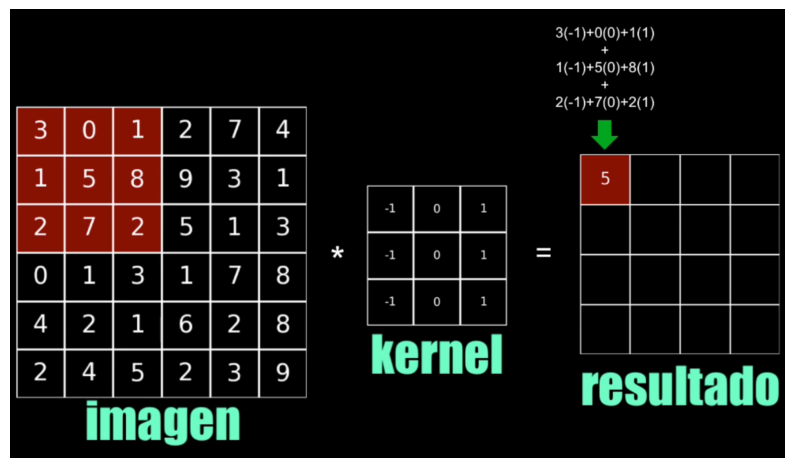

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv1.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

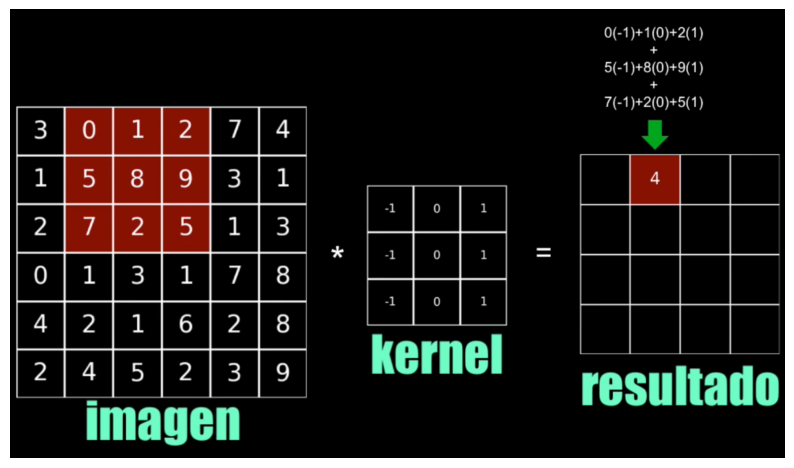

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv2.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

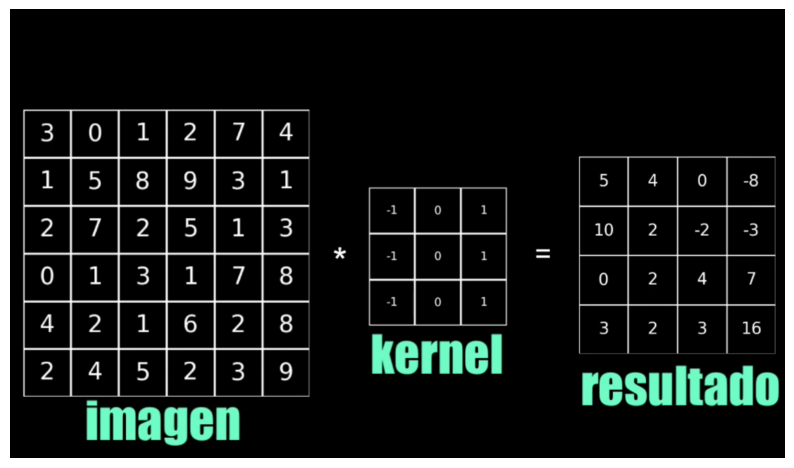

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv3.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

Obsérvece que en el caso anterior, algunos números son negativos. Por este motivo se aplica la función "relu":
$$
f(x) = max(0,x),
$$
que transforma los valores negativos en cero.




In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv4.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Imagenes/Conv4.png'

<Figure size 1000x600 with 0 Axes>

### 2. Capa de Pooling (Reducción)
Tipos comunes:
- **Max Pooling**: Toma el valor máximo en la ventana
- **Average Pooling**: Promedia los valores


### 4. Capas Fully Connected
- Conectan todas las neuronas entre capas
- Combinan características para la clasificación final

## Hiperparámetros clave
| Parámetro        | Valores típicos | Efecto |
|------------------|----------------|--------|
| Tamaño de filtro | 3x3, 5x5       | Detecta patrones más grandes |
| Número de filtros| 32, 64, 128    | Cantidad de características aprendidas |
| Stride           | 1, 2           | Controla el desplazamiento del filtro |
| Padding          | 'same', 'valid'| Conserva dimensiones o no |

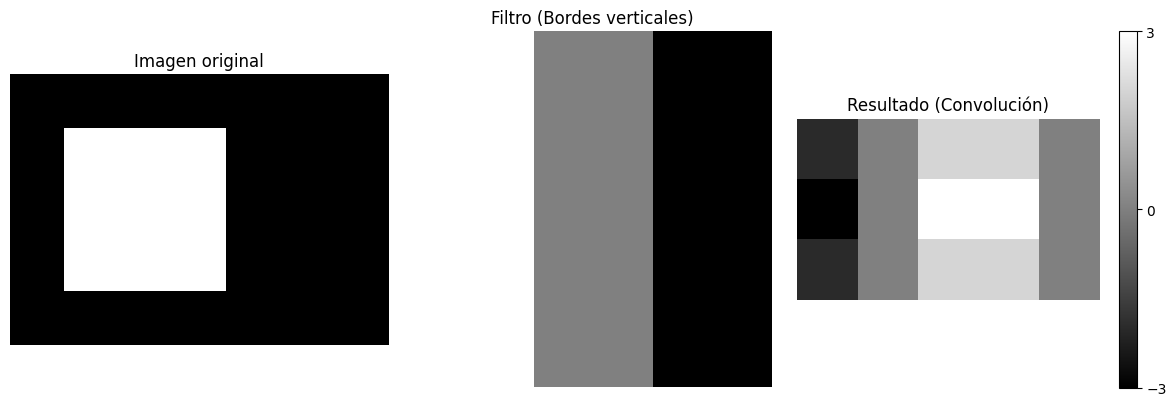

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Imagen y filtro
imagen = np.array([
    [0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0],
    [0,1,1,1,0,0,0],
    [0,1,1,1,0,0,0],
    [0,0,0,0,0,0,0]
])

filtro = np.array([
    [1, 0,-1],
    [1, 0,-1],
    [1, 0,-1]
])

# Convolución manual
resultado = np.zeros((3, 5))
for i in range(3):
    for j in range(5):
        resultado[i, j] = np.sum(imagen[i:i+3, j:j+3] * filtro)

# Visualización
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray', vmin=0, vmax=1)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtro, cmap='gray', vmin=-1, vmax=1)
plt.title("Filtro (Bordes verticales)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resultado, cmap='gray', vmin=-3, vmax=3)
plt.title("Resultado (Convolución)")
plt.colorbar(ticks=[-3, 0, 3])  # Barra de colores personalizada
plt.axis('off')

plt.tight_layout()
plt.show()

## Flujo de datos en una CNN

1. **Capa de Input**:
   - Recibe la imagen en formato (alto, ancho, canales)
   - Ejemplo: (224, 224, 3) para imágenes RGB

2. **Bloques Convolucionales** (Repetidos):
   - Convolución → Activación (ReLU) → Pooling
   - Profundidad aumenta, dimensiones espaciales disminuyen

3. **Capa de Aplanado**:
   - Convierte los mapas de características 3D a 1D

4. **Capas Fully Connected**:
   - Combinan características para clasificación

5. **Capa de Salida**:
   - Softmax para problemas multi-clase
   - Sigmoid para clasificación binaria

## Ventajas sobre redes densas:
- Requieren menos parámetros
- Capturan relaciones espaciales
- Invariantes a pequeñas transformaciones
- Jerarquía automática de características

### Librerías

Verificación versión de TensorFlow

In [1]:
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [2]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 1026, done.
remote: Counting objects: 100% (322/322), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 1026 (delta 272), reused 103 (delta 95), pack-reused 704 (from 2)
Receiving objects: 100% (1026/1026), 58.12 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (541/541), done.


In [3]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



In [4]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

726
712
['TfQG2fJYyDv8Ic8P.png', 'EesxTpYzhZoMVlH8.png', '8Gew5erdZ7A4K3gI.png', 'RydyYWgvhLQPwEaw.png', '256MrhkDete6aQhP.png', 'o1cPo5Z2YLfTz2vJ.png', 'jWUoY57nkFKUUdD5.png', 'cDveaur4dR2ZCCo8.png', 'JSDICtLrQIEXhPy5.png', 'eqJEQe8W9FP4TOck.png', 'j1EfA5DclfCJdzLb.png', 'FoYWUBXBw6qO7y0f.png', 'cPuxKnJCdcTotM5k.png', '7vtC68OSHd1FZJvN.png', 'OA0s5AsfJEm96cxd.png', 'aMAVOdimraDSK6P1.png', 'gzRmdTIFRzV34Vjl.png', 'jMVjrTQfvJ0xLTOt.png', 'zdo3LHesq3aHmu1f.png', 'lhD4U5er2UL6nfAH.png', '8Q1PAZsxpLf5FAo6.png', 'kC1AoCFrvaMKlTDk.png', 'NR48QMe5e1gskpA9.png', '2C9FEbBklwcVhF3W.png', 'mmLhBFvXWgD957XY.png', 'QGySPOxev60wlq1M.png', 'vMAludIRGF14FuGn.png', 'WUEe440w137BuSEE.png', 'pZ9zE5ahoKZhIZqm.png', '3n4i3lKB3nZOpDVv.png', 'bn7yju6XvU87slzH.png', '2ZPcSpOm7SEfQYwg.png', 'KSNET1XTWbrg5Rcz.png', 'oYB271o4Oo5uFHpW.png', '55yz6JI9f5DTbq9D.png', '5DdrFpDc8YbG1oCo.png', '64ktckSF0c26K6AY.png', 'oxyMOfWC1lQU6dRf.png', '5mipmm4t8RM5o0tW.png', 'wT8z7icdMJt816Ix.png', 'UPH9bl4Vrq4Gwp3K.png', 'FCsZ8x

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [ ]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba



# Inicializar arrays para almacenar los datos




# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test






# Visualización de imágenes aleatorias

In [ ]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas


# Mostrar 100 imágenes en una cuadrícula de 10x10



## Visualización de una sola imagen en tamaño grande

In [ ]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)


# Mostrar la imagen de prueba número aleatorio del conjunto de datos


# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles


In [ ]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]


# Modelo CNN para Clasificación de Imágenes

In [ ]:
# Definición del modelo secuencial (capas apiladas linealmente)


# Cofigurarción del Modelo para Entrenamiento

In [ ]:
#Compilar

# Entrenamiento de la CNN

In [ ]:
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.



# Evaluación del modelo

In [ ]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)




# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [ ]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen


# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

# Salida de la CNN para cada imagen del conjunto de prueba

# Resultado de la evaluación: matriz de confusión:

# Actividad

Dataset: CIFAR-10
CIFAR-10 es un conjunto de datos clásico que contiene 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases (aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Cada clase tiene 6,000 imágenes.


Realizar la calsificación de las 10 clases utilizando CNN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


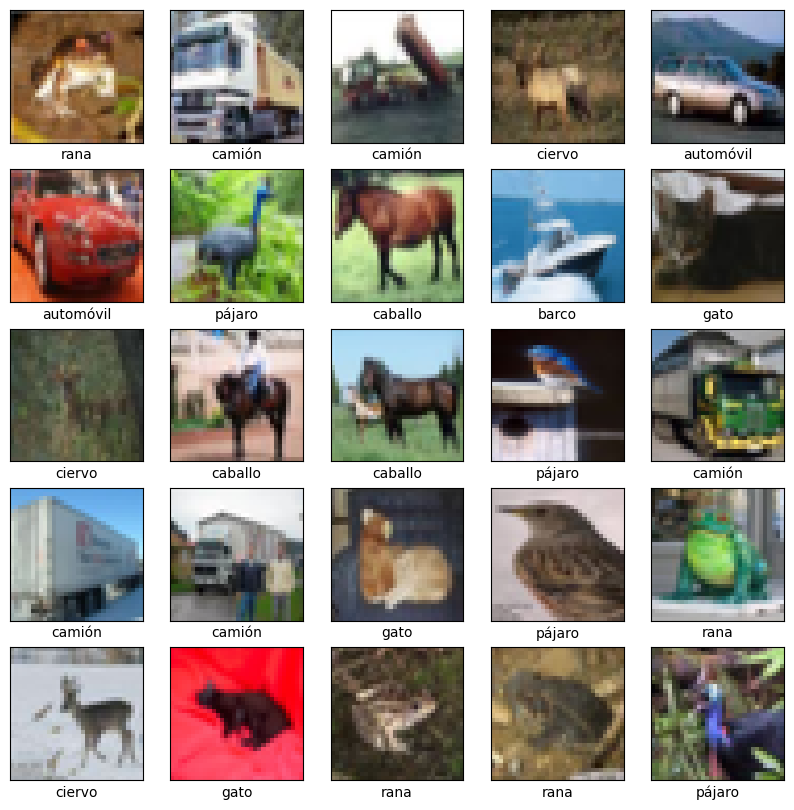

In [ ]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizar algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()